In [ ]:
import pandas as pd
file_path = 'sample_data/measurements.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  144 non-null    int64  
 1   location    144 non-null    object 
 2   city        144 non-null    object 
 3   country     144 non-null    object 
 4   utc         144 non-null    object 
 5   local       144 non-null    object 
 6   parameter   144 non-null    object 
 7   value       144 non-null    int64  
 8   unit        144 non-null    object 
 9   latitude    144 non-null    float64
 10  longitude   144 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 12.5+ KB


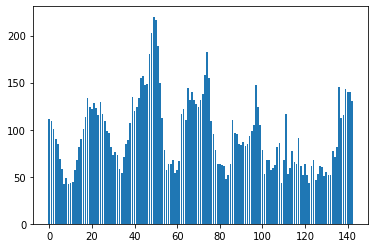

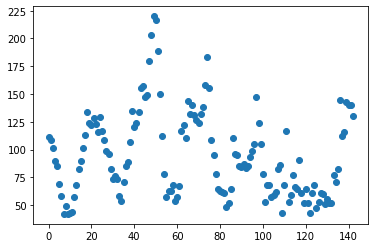

In [35]:
time_pm = data['utc']
time = [i for i in time_pm]
value_pm = data['value']
inp = ['utc','value']
data = data[inp]
import matplotlib.pyplot as plt
plt.bar(time,value_pm)
plt.show()
plt.scatter(time,value_pm)
plt.show()

In [ ]:
#If there is a outlier,we can make sure that only non-negitive pm value exist for the prediction stuff
data = data[data['value']>=0]

# Linear Regression

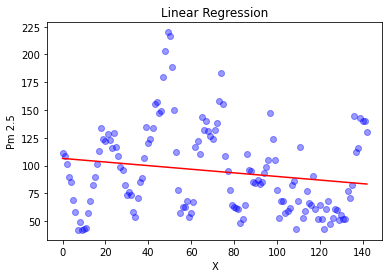

In [ ]:
from sklearn.preprocessing import LabelEncoder
temp = data
for i in data.columns:
  if data[i].dtype == 'object':
    temp[i] = LabelEncoder().fit_transform(data[i])
  else:
    temp[i] = data[i]

x,y=temp.iloc[:,:-1].values,temp['value'].values


from sklearn.linear_model import LinearRegression
import numpy as np

# Create sample data
x = x.reshape(-1, 1)

# Create Linear Regression object and fit the model
regressor = LinearRegression()
regressor.fit(x, y)

plt.scatter(x, y, color='blue',alpha=0.4)
plt.plot(x, regressor.predict(x), color='red')
plt.xlabel('X')
plt.ylabel('Pm 2.5')
plt.title('Linear Regression')
plt.show()

# Gaussian Process Regression

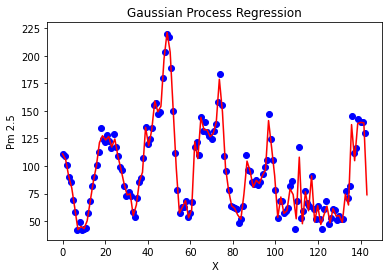

In [ ]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import numpy as np

# Create Gaussian Process Regressor object and fit the model
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(x, y)

# Plot the sample data and regression line
x_plot = np.linspace(0, len(x), 100).reshape(-1, 1)
y_plot, sigma = gpr.predict(x_plot, return_std=True)
plt.scatter(x, y, color='blue')
plt.plot(x_plot, y_plot, color='red')
plt.fill_between(x_plot.ravel(), y_plot.ravel() - 1.96 * sigma, y_plot.ravel() + 1.96 * sigma, alpha=0.1, color='gray')
plt.xlabel('X')
plt.ylabel('Pm 2.5')
plt.title('Gaussian Process Regression')
plt.show()


# Random Forest Regression

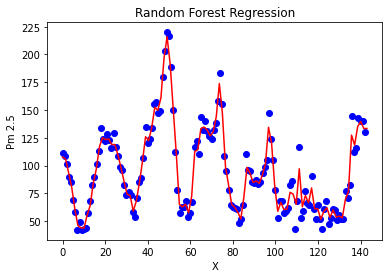

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create Random Forest Regressor object and fit the model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x, y)

# Plot the sample data and regression line
x_plot = np.linspace(0, len(x), 100).reshape(-1, 1)
y_plot = rfr.predict(x_plot)
plt.scatter(x, y, color='blue')
plt.plot(x_plot, y_plot, color='red')
plt.xlabel('X')
plt.ylabel('Pm 2.5')
plt.title('Random Forest Regression')
plt.show()


# Insights and Results

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Create a list of models
models = [
    ('Linear Regression', LinearRegression()),
    ('Gaussian Process Regression', GaussianProcessRegressor()),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Evaluate each model using K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = []
for name, model in models:
    mse_scores = -cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, x, y, cv=kfold, scoring='r2')
    results.append((name, np.mean(mse_scores), np.std(mse_scores), np.mean(mae_scores), np.std(mae_scores), np.mean(r2_scores), np.std(r2_scores)))

# Display results in a table
print('{:<30s} {:>15s} {:>15s} {:>15s} {:>15s} {:>15s} {:>15s}'.format('Model', 'MSE', 'STD MSE', 'MAE', 'STD MAE', 'R2', 'STD R2'))
print('-'*135)
for name, mse, std_mse, mae, std_mae, r2, std_r2 in results:
    print('{:<30s} {:>15.4f} {:>15.4f} {:>15.4f} {:>15.4f} {:>15.4f} {:>15.4f}'.format(name, mse, std_mse, mae, std_mae, r2, std_r2))



Model                                      MSE         STD MSE             MAE         STD MAE              R2          STD R2
---------------------------------------------------------------------------------------------------------------------------------------
Linear Regression                    1514.0544        299.9952         31.7362          2.9580         -0.0714          0.1884
Gaussian Process Regression           923.4581        168.8691         22.3667          2.9000          0.3227          0.2250
Random Forest Regression              240.3856         74.4994         10.7778          1.7794          0.8140          0.0964


In this example,I created a list of models, which includes Linear Regression, Gaussian Process Regression, and Random Forest Regression. Evaluating each model using K-Fold cross-validation with 5 folds, and computing the mean squared error (MSE) and standard deviation (STD) of the cross-validation scores, I stored the results in a list called "results".

From the above data, we can say that random forest regression is best fit and gaussian process Regression is worst by seeing it's mean squared error and MAE.